#### Bayesian inference and Data assimilation SS2023

# Exercise 7 sample sample solution

#### Jin W. Kim (jin.won.kim@uni-potsdam.de)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

#### 1.1
Let the probability vector $p_n$ be $$ p_n = \begin{pmatrix} \mathbb{P}[\text{Day }n\text{ is sunny}] \\ \mathbb{P}[\text{Day }n\text{ is overcast}] \\ \mathbb{P}[\text{Day }n\text{ is rainy}] \end{pmatrix} $$
Then we observe that
$$
p_{n+1} = Pp_n
$$
Now we know that today is sunny, that is, $p_1 = [1,0,0]^T$. Now on the day 2, it is simply the first column of $P$:
$$
p_2 = Pp_1 = \begin{pmatrix} \frac{1}{2} \\ \frac{1}{3} \\ \frac{1}{6} \end{pmatrix}
$$
On the day after tomorrow,
$$
p_3 = Pp_2 = \begin{pmatrix} \frac{1}{2} & \frac{1}{4} & \frac{1}{5} \\ \frac{1}{3} & \frac{1}{2} & \frac{2}{5} \\ \frac{1}{6} & \frac{1}{4} & \frac{2}{5} \end{pmatrix}\begin{pmatrix} \frac{1}{2} \\ \frac{1}{3} \\ \frac{1}{6} \end{pmatrix} = \begin{pmatrix} \frac{11}{30} \\ \frac{12}{30} \\ \frac{7}{30} \end{pmatrix}
$$

#### 1.2
The invariant measure is given by solving $p = Pp$, and normalize it. It is equivalent to find the null-space of the matrix $P-I$. We solve $$ \begin{pmatrix} \frac{1}{2}-1 & \frac{1}{4} & \frac{1}{5} \\ \frac{1}{3} & \frac{1}{2}-1 & \frac{2}{5} \\ \frac{1}{6} & \frac{1}{4} & \frac{2}{5} -1 \end{pmatrix}\begin{pmatrix} a \\ b \\ c \end{pmatrix} = 0 $$ Set $a=6$ to make some values integer. Note that we already know 1 is an eigenvalue, so we may arbitrarily choose $a$ and drop one line. The leading 2 entities will give $$ -3 + \frac{b}{4} + \frac{c}{5} = 0 \\ 2 - \frac{b}{2} + \frac{2c}{5} = 0$$ Therefore
$$ 5b+4c = 60 \\ -5b + 4c = -20 $$ The solution is $b = 8$ and $c=5$. We normalize and obtain
$$
p = \begin{pmatrix} \frac{6}{19} \\ \frac{8}{19} \\ \frac{5}{19} \end{pmatrix}
$$

#### 1.3

In [4]:
"Implement the Markov chain"
def sample_from(pmf):
    ss = np.arange(len(pmf),dtype = int)
    cdf = np.cumsum(pmf)
    omega = np.random.uniform(high = cdf[-1])
    return ss[np.searchsorted(cdf, omega)]
    
class mcmc(object):
    """
    Simulate a Markov chain
    P is a column-stochastic state transition matrix
    """
    def __init__(self, P, x0):
        self.P = P
        self.x = np.copy(x0)
            
    def step(self):
        self.x = sample_from(P[:,self.x])    

In [5]:
"Run the simulation"
N = 190         #Number of samples
T = 30          #Final time
P = np.array([[1/2,1/4,1/5],[1/3,1/2,2/5],[1/6,1/4,2/5]])
samples = [mcmc(P,0) for i in range(N)]

result = np.zeros((T,N), dtype = int)
for t in range(T):      #This is extremely inefficient implementation, more-or-less a pseudo code. You can easily make it parallel.
    for i in range(N):
        result[t,i] = samples[i].x
        samples[i].step()

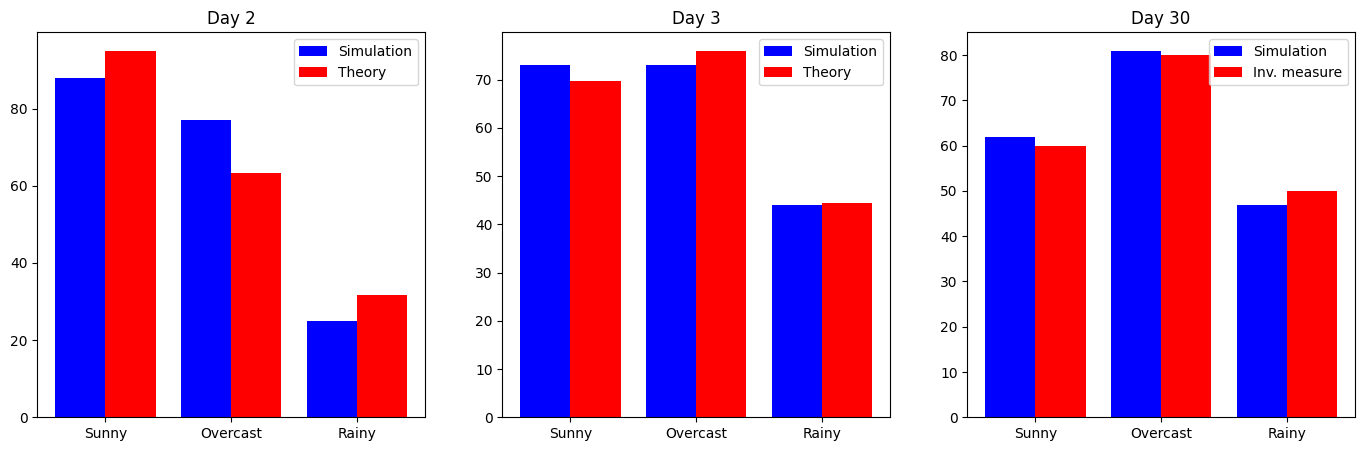

In [6]:
"Plot the result on day 2, 3 and 30"
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#counter
index = np.arange(3,dtype = int)

def cnt(res):
    return np.array([(res == i).sum() for i in index])


# Day 2
count_day2 =  cnt(result[1])  #np.unique(result[1], return_counts=True)
ax1.bar(index, count_day2 , 0.4, label='Simulation',color = 'blue')
ax1.bar(index + 0.4, [N/2,N/3,N/6], 0.4, label='Theory',color = 'red')
ax1.set_title("Day 2")
ax1.set_xticks(index+0.2, ('Sunny', 'Overcast', 'Rainy'))
ax1.legend()

# Day 3
count_day3 = cnt(result[2]) #np.unique(result[2], return_counts=True)
ax2.bar(index, count_day3 , 0.4, label='Simulation',color = 'blue')
ax2.bar(index + 0.4, [N*11/30,N*12/30,N*7/30], 0.4, label='Theory',color = 'red')
ax2.set_title("Day 3")
ax2.set_xticks(index+0.2, ('Sunny', 'Overcast', 'Rainy'))
ax2.legend()

# Day 30 (The last day of simulation)
count_last = cnt(result[-1]) # np.unique(result[-1], return_counts=True)
ax3.bar(index, count_last , 0.4, label='Simulation',color = 'blue')
ax3.bar(index + 0.4, [N*6/19,N*8/19,N*5/19], 0.4, label='Inv. measure',color = 'red')
ax3.set_title("Day {:}".format(T))
ax3.set_xticks(index+0.2, ('Sunny', 'Overcast', 'Rainy'))
ax3.legend()

#### 1.4
The simulation result has the same trend with the invariant measure. We can also observe that it becomes more close to the theoretical value as we increase the number of samples and the simulation time horizon.

We can verify that $p_n$ converges to the invariant measure from any initial measure $p_1$ if 1 is a simple eigenvalue of $P$. Hence we conpute the eigenvalues of $P$ here:

In [7]:
"Eigenvalues of P"
evs, _ = np.linalg.eig(P)
print("The eigenvalues of P is {:3.1f}, {:6.4f} and {:6.4f}".format(evs[0], evs[1], evs[2]))

The eigenvalues of P is 1.0, 0.2816 and 0.1184


#### 1.5
This is the case where we condition on the day 2 is NOT sunny. Therefore, we can simply drop all the sample paths whose day 2 state is sunny, and then evaluate the probability using the remaining sample paths.

In [8]:
"Print the result on day 2"
index, count_day2 = np.unique(result[1], return_counts=True)
day2_not_sunny = count_day2[1]+count_day2[2]
print("On day 2, provided that it is not sunny, {:4.2f}% of samples were overcast, {:4.2f}% of samples were rainy".format(
    100*count_day2[1]/day2_not_sunny, 100*count_day2[2]/day2_not_sunny))
print("This result is drawn from only {:} samples".format(day2_not_sunny))

On day 2, provided that it is not sunny, 75.49% of samples were overcast, 24.51% of samples were rainy
This result is drawn from only 102 samples


#### 1.6

[29 44 29]


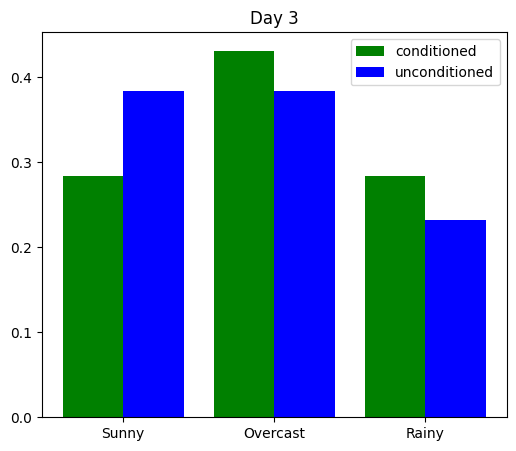

In [9]:
"Day 3 conditioned on the day 2"
day2_indices = result[1] != 0
count_day3_conditioned = cnt(result[2,day2_indices])
print(count_day3_conditioned)
plt.figure(figsize=(6,5))
plt.bar(index, count_day3_conditioned/day2_not_sunny, 0.4, label='conditioned',color = 'green')
plt.bar(index + 0.4, count_day3/N, 0.4, label='unconditioned',color = 'blue')
plt.title("Day 3")
plt.xticks(index+0.2, ('Sunny', 'Overcast', 'Rainy'))
plt.legend()

We can observe that the result changed due to conditioning.


#### 1.7
We have to consider both cases when the the report is trustworthy and when it should be ignored. We can use the samples, but we have to first normalize them first.

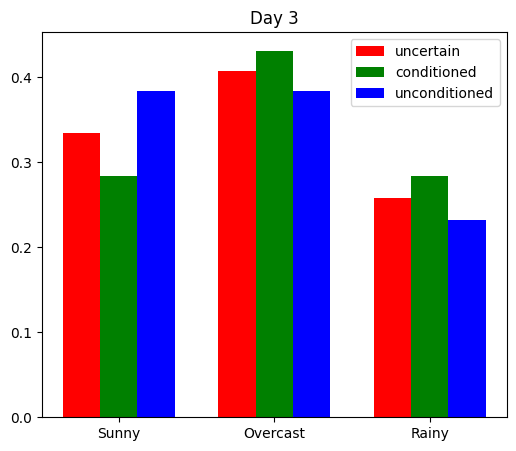

In [11]:
"Combining the two cases"
p3_conditioned = count_day3_conditioned/day2_not_sunny
p3_unconditioned = count_day3/N

p3_believe_or_not = 0.5*p3_conditioned + 0.5*p3_unconditioned

plt.figure(figsize=(6,5))
plt.bar(index, p3_believe_or_not, 0.24, label='uncertain',color = 'red')
plt.bar(index + 0.24, p3_conditioned, 0.24, label='conditioned',color = 'green')
plt.bar(index + 0.48, p3_unconditioned, 0.24, label='unconditioned',color = 'blue')
plt.title("Day 3")
plt.xticks(index+0.24, ('Sunny', 'Overcast', 'Rainy'))
plt.legend()    

#### 1.8
As we have seen in step 5, the sample size becomes about half of the original samples. In order to overcome this, often we re-sample according to the conditional distribution using the samples.